# Principles of EM 

HW4 

Nick Goralka

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import math


<Axes: title={'center': "Green's Function Closed vs Spectral Approach"}, xlabel='x'>

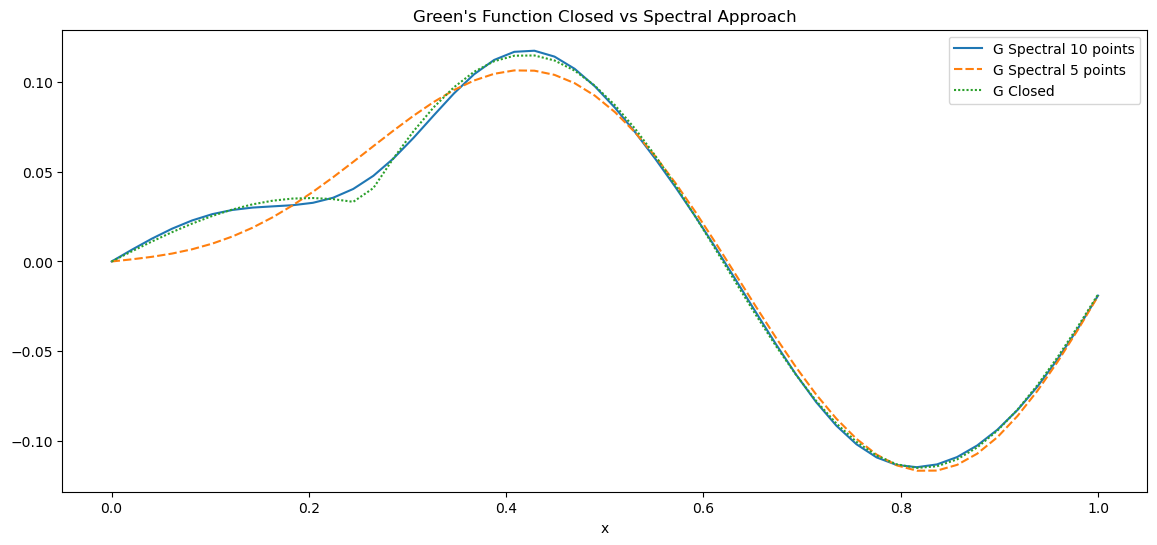

In [58]:
BLOWOUT = 10**3
PI = 3.1415926535897932384626433832795028841
OMEGA = 8
X_MIN = 0
X_MAX = 1

NPTS = 50

x_val = np.linspace(X_MIN, X_MAX, NPTS)
x_prime = 0.25

def Gsp (x, x_prime, w, N):
    g_sp = 0
    for m in range(1, N):
        g_sp += ( 2 * math.sin(m * PI * x) * math.sin(m * PI * x_prime) ) / (w**2 - (m * PI)**2)
    return g_sp
    
def Gcf (x, x_prime, w):
    if (x_prime <= x):
        return -(math.sin(w*(1-x))*math.sin(w*x_prime))/(w * math.sin(w))
    elif(x_prime >= x):
        return -(math.sin(w*(1-x_prime))*math.sin(w*x))/(w * math.sin(w))

def calc_spectral_greens(N, x_min, x_max, omega):
    G_spectral = np.zeros(NPTS)
    idx = 0

    x = x_min
    while (x < x_max):
        G_spectral[idx] += Gsp (x, x_prime, omega, N)
        idx += 1
        x += (x_max - x_min)/NPTS

    return G_spectral
    
def calc_closed_greens (x_min, x_max, omega):
   
    G_closed = np.zeros(NPTS)
    idx = 0
    x = x_min
    while (x < x_max ):
        G_closed[idx] += Gcf (x, x_prime, omega)
        idx += 1
        x += (x_max - x_min)/NPTS

    return G_closed

d = {'x': x_val, 
     'G Spectral 10 points': calc_spectral_greens(10, X_MIN, X_MAX, OMEGA), 
     'G Spectral 5 points': calc_spectral_greens(5, X_MIN, X_MAX, OMEGA), 
     "G Closed": calc_closed_greens(X_MIN, X_MAX, OMEGA),}
data = pd.DataFrame(data=d)
data = data.set_index('x')

# Set the width and height of the figure
fig = plot.figure(figsize=(14,6))


# Add title
plot.title("Green's Function Closed vs Spectral Approach")

sns.lineplot(data)

<Axes: title={'center': "Green's Function Spectral Approach (Singularity at omega = 2 pi)"}, xlabel='x'>

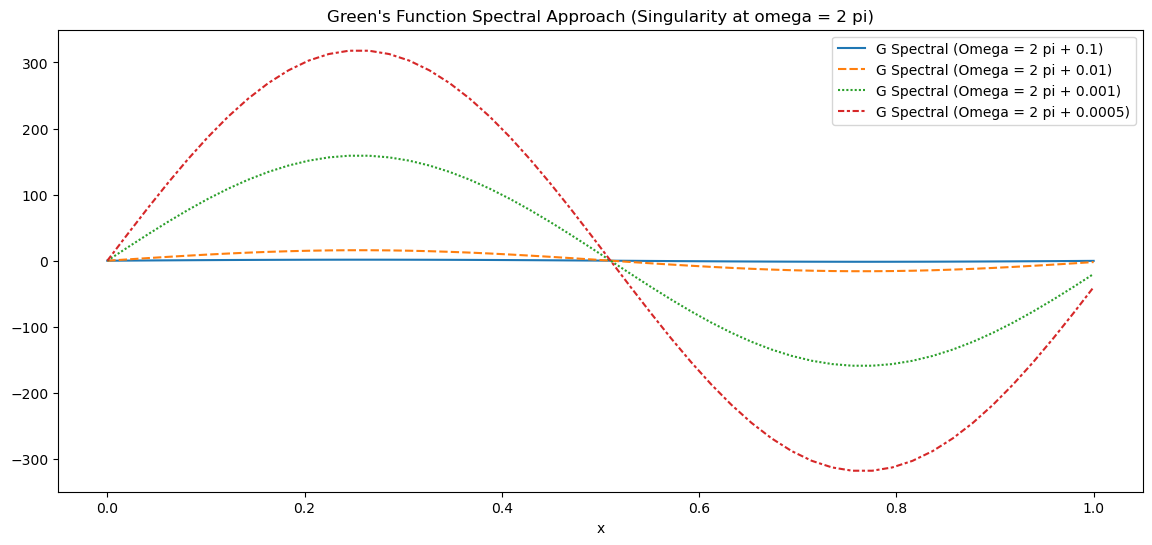

In [64]:

d = {'x': x_val, 
     'G Spectral (Omega = 2 pi + 0.1)': calc_spectral_greens(10, X_MIN, X_MAX, 2 * PI + 0.1), 
     'G Spectral (Omega = 2 pi + 0.01)': calc_spectral_greens(5, X_MIN, X_MAX, 2 * PI + 0.01), 
     'G Spectral (Omega = 2 pi + 0.001)': calc_spectral_greens(5, X_MIN, X_MAX, 2 * PI + 0.001), 
     'G Spectral (Omega = 2 pi + 0.0005)': calc_spectral_greens(5, X_MIN, X_MAX, 2 * PI + 0.0005),
     #"G Closed": calc_closed_greens(X_MIN, X_MAX, 2*PI),
     }
spec_pos_data = pd.DataFrame(data=d)
spec_pos_data = spec_pos_data.set_index('x')


# Set the width and height of the figure
fig = plot.figure(figsize=(14,6))


# Add title
plot.title("Green's Function Spectral Approach (Singularity at omega = 2 pi)")

sns.lineplot(spec_pos_data)

<Axes: title={'center': "Green's Function Spectral Approach (Singularity at omega = 2 pi)"}, xlabel='x'>

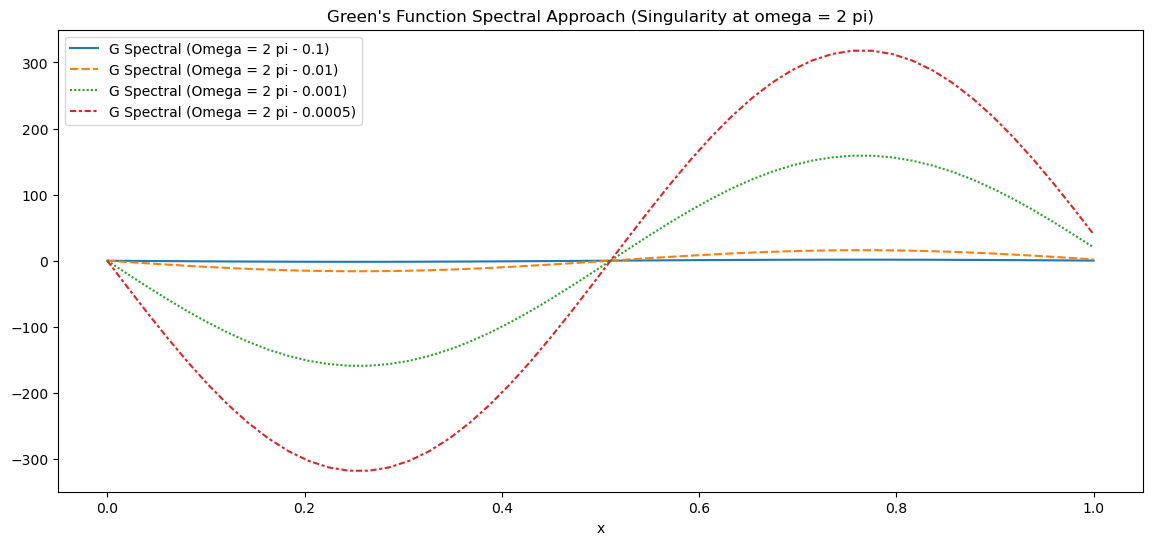

In [60]:
d = {'x': x_val, 
     'G Spectral (Omega = 2 pi - 0.1)': calc_spectral_greens(10, X_MIN, X_MAX, 2 * PI - 0.1), 
     'G Spectral (Omega = 2 pi - 0.01)': calc_spectral_greens(5, X_MIN, X_MAX, 2 * PI - 0.01), 
     'G Spectral (Omega = 2 pi - 0.001)': calc_spectral_greens(5, X_MIN, X_MAX, 2 * PI - 0.001), 
     'G Spectral (Omega = 2 pi - 0.0005)': calc_spectral_greens(5, X_MIN, X_MAX, 2 * PI - 0.0005), 
     # "G Closed": calc_closed_greens(X_MIN, X_MAX, 2*PI),
     }
spec_neg_data = pd.DataFrame(data=d)
spec_neg_data = spec_neg_data.set_index('x')


# Set the width and height of the figure
fig = plot.figure(figsize=(14,6))


# Add title
plot.title("Green's Function Spectral Approach (Singularity at omega = 2 pi)")

sns.lineplot(spec_neg_data)

<Axes: title={'center': "Green's Function Closed Form (x_prime = 0.5)"}, xlabel='x'>

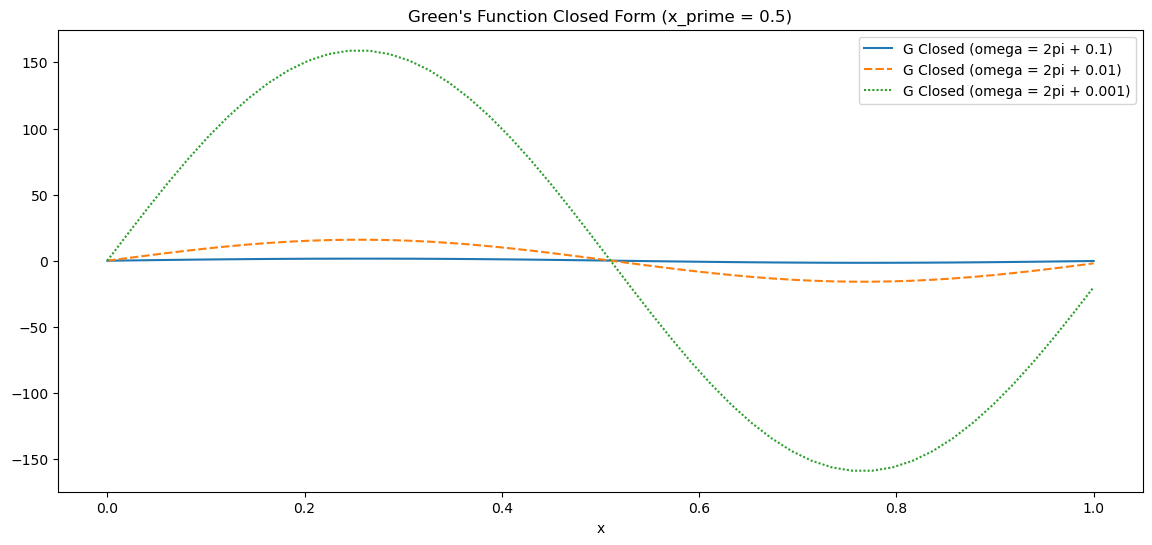

In [61]:
x_prime = 0.25

d = {'x': x_val, 
     "G Closed (omega = 2pi + 0.1)": calc_closed_greens(X_MIN, X_MAX, 2*PI + 0.1),
     "G Closed (omega = 2pi + 0.01)": calc_closed_greens(X_MIN, X_MAX, 2*PI + 0.01),
     "G Closed (omega = 2pi + 0.001)": calc_closed_greens(X_MIN, X_MAX, 2*PI + 0.001),
     }
closed_data = pd.DataFrame(data=d)
closed_data = closed_data.set_index('x')


# Set the width and height of the figure
fig = plot.figure(figsize=(14,6))


# Add title
plot.title("Green's Function Closed Form (x_prime = 0.5)")

sns.lineplot(closed_data)